# Preliminary Analysis 

Analysis of artificial aneurysms introduced in the RCA with ASI = 2, at proximal/media/distal locations, with 5 sizes per position

In [1]:
import numpy as np
import vtk
from vtk.util import numpy_support as nps
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import os 

In [2]:
np.random.seed(sum(map(ord,"palettes")))
%matplotlib inline


In [3]:
from AneurysmGeneration.utils.batch import * 


Gotta read in the simulation results 

In [4]:
# define path
results_path_base = 'Artificial/RCA/'
source_path_base = 'AneurysmGeneration/models/SKD0050/'

In [5]:
def return_polydata(path, return_reader=False):
    '''
        Given a file name, open and return the data
    '''

    print 'return polydata'


    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(path)
    reader.Update()
    polydata = reader.GetOutput()

    if return_reader:
        return (polydata, reader)

    return polydata

Read in the clipped aneurysms 

In [40]:
clipped_dir = 'clipped_results_short/'
vessel = 'RCA/ASI2/'
zscores=[6, 8, 10, 12, 14]
proximal = ['p1', 'p2', 'p3', 'p4', 'p5']
medial = ['m1', 'm2', 'm3', 'm4', 'm5']
distal = ['d1', 'd2', 'd3', 'd4', 'd5']

In [41]:
vtawss_dict = {}
vtawss_avgs = np.zeros((3, 5))
for i, position in enumerate([proximal, medial, distal]):
    for j, size in enumerate(zscores): 
        if j >= len(position): continue
        aneurysm = position[j]
        path_to_clipped_result = clipped_dir + vessel + aneurysm + '.vtp'
        clipped_result_polydata = return_polydata(path_to_clipped_result)
        v_tawss = nps.vtk_to_numpy(clipped_result_polydata.GetPointData().GetArray('vTAWSS'))
        vtawss_avgs[i, j] = np.mean(v_tawss)
        vtawss_dict[(i, j)] = v_tawss
        
# for aneurysm in proximal + medial:
#     print aneurysm
#     path_to_clipped_result = clipped_dir + vessel + aneurysm + '.vtp'
#     clipped_result_polydata = return_polydata(path_to_clipped_result)
#     v_tawss = nps.vtk_to_numpy(clipped_result_polydata.GetPointData().GetArray('vTAWSS'))
#     vtawss_dict[aneurysm] = np.mean(v_tawss)
    

return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata


In [ ]:
print vtawss_dict


In [48]:
print vtawss_avgs

[[6.04847444 5.44500151 4.69613926 4.36683851 4.12913545]
 [9.56304415 8.41362484 8.24518237 6.35982849 5.22949036]
 [6.55778074 7.36489354 6.1993882  5.63373113 3.66984208]]


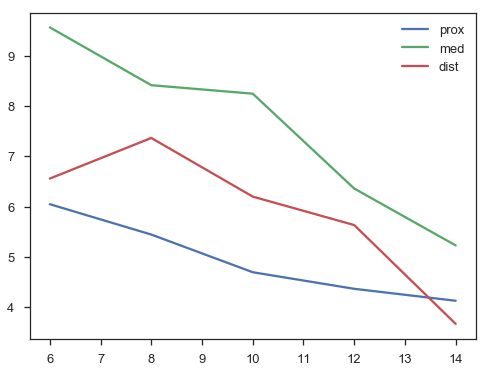

In [42]:
labels = ['prox', 'med', 'dist']
plt.figure()
for i in range(len([proximal, medial, distal])):
    plt.plot(zscores, vtawss_avgs[i], label=labels[i])
    # TODO: make the z-score labels only the actual points
    
plt.legend()


Prepare CDFs to look at the rough distribution of the wall shear stress (FEM node-based visualization) 

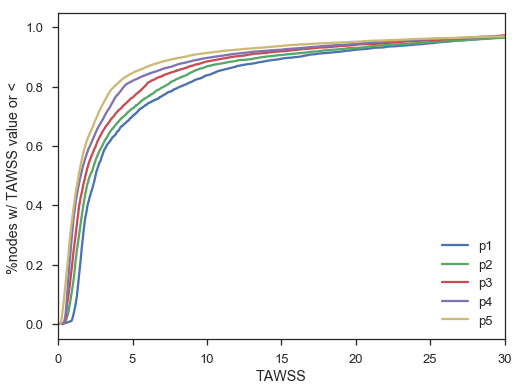

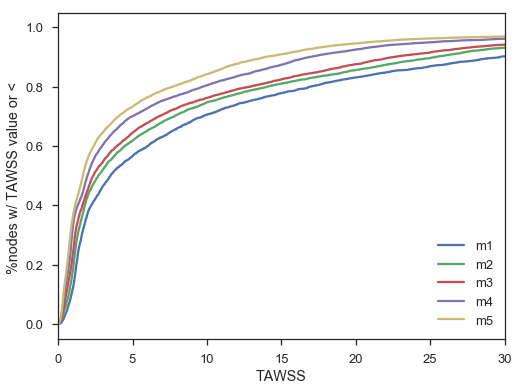

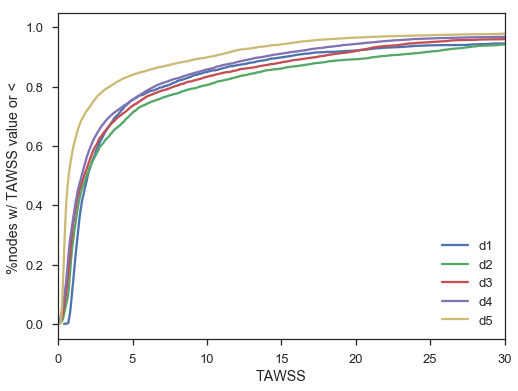

In [43]:
labels = [['p1', 'p2', 'p3', 'p4', 'p5'],
          ['m1', 'm2', 'm3', 'm4', 'm5'],
          ['d1', 'd2', 'd3', 'd4', 'd5']]

for i, labelset in enumerate(labels): 
    plt.figure()
    for j, label in enumerate(labelset): 
        ss = vtawss_dict[(i, j)]
        ss_sorted = np.sort(ss)
        plt.plot(ss_sorted, np.array(range(len(ss)))/float(len(ss)), label=label)
        
        # TODO: plot titles describing location
        # TODO: legend labels w/ z-score
        # TODO: animate these? 
    plt.legend()
    plt.xlim(0, 30)
    plt.xlabel('TAWSS')
    plt.ylabel('%nodes w/ TAWSS value or < ')

In [18]:
sns.set(rc={"figure.figsize":(8,6)})
sns.set_style('white', {'axes.spines.right':False})
sns.set_style('ticks')
sns.set_context('talk')
sns.despine(trim=True)

<Figure size 576x432 with 0 Axes>

In [28]:
all_area_fractions_right = read_from_file('area_fractions_rca')

reading structures from pickle
------------------------------


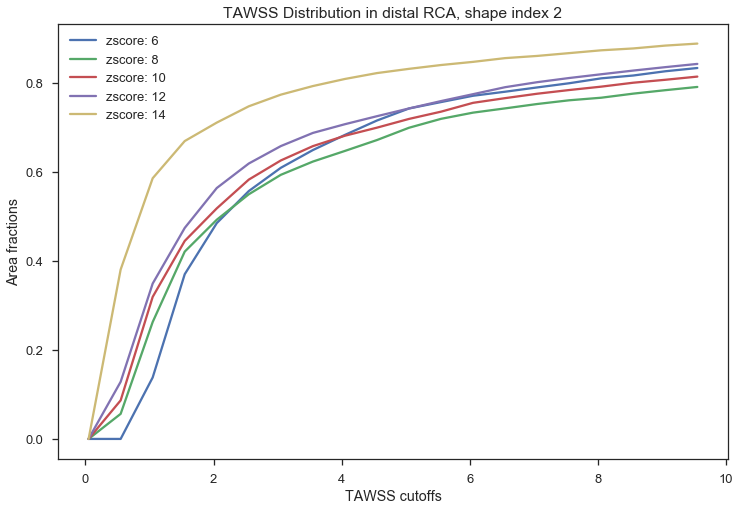

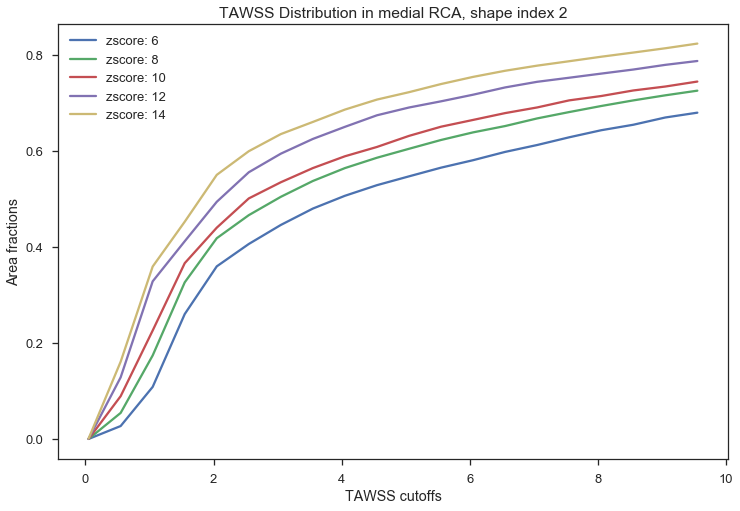

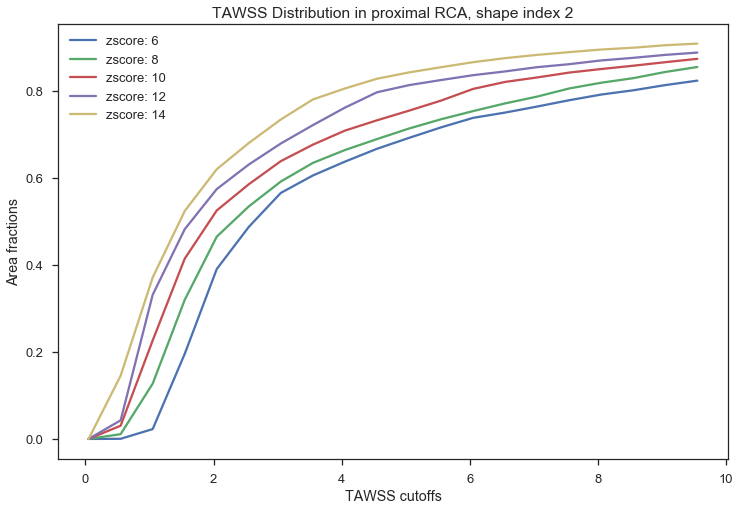

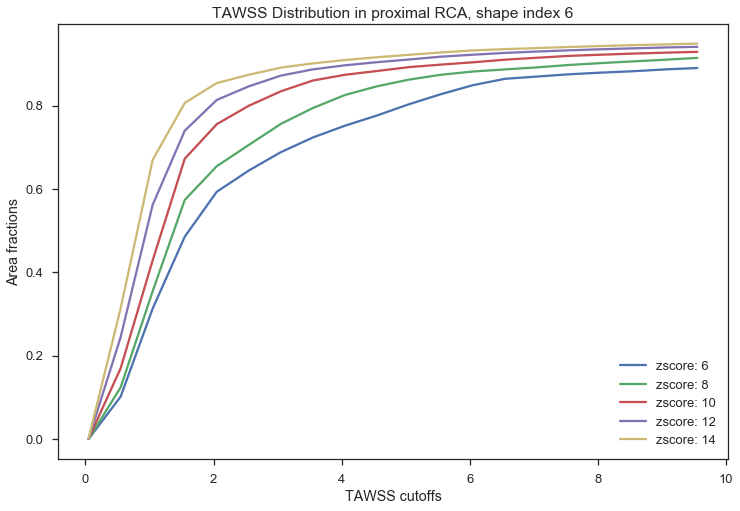

In [95]:
base_path = '/Users/alex/Documents/lab/KD-project/clipped_results_short/'
vessel = 'RCA/'
shapes = ['ASI2', 'ASI6']
proximal = ['p1', 'p2', 'p3', 'p4', 'p5']
medial = ['m1', 'm2', 'm3', 'm4', 'm5']
distal = ['d1', 'd2', 'd3', 'd4', 'd5']
z_scores = [6, 8, 10, 12, 14]
threshold_bounds = np.arange(.05, 10.0, .5)

for shape in shapes: 
    pos_sizes = {'proximal': proximal, 
                 'medial': medial, 
                 'distal': distal}
    if shape == 'ASI6': pos_sizes = {'proximal': proximal}
        
    for position, size_list in pos_sizes.iteritems():
        plt.figure(figsize=(12,8))
        # plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            fracs = all_area_fractions_right[shape + '_' + size]
            plt.plot(threshold_bounds, fracs, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('TAWSS Distribution in ' + position + ' ' + vessel[:-1] + ', shape index ' + shape[-1])
        plt.xlabel('TAWSS cutoffs')
        plt.ylabel('Area fractions')
    

In [55]:
all_area_fractions_lad = read_from_file('WSS_THRESHOLD_AREA_LAD')

reading structures from pickle
------------------------------


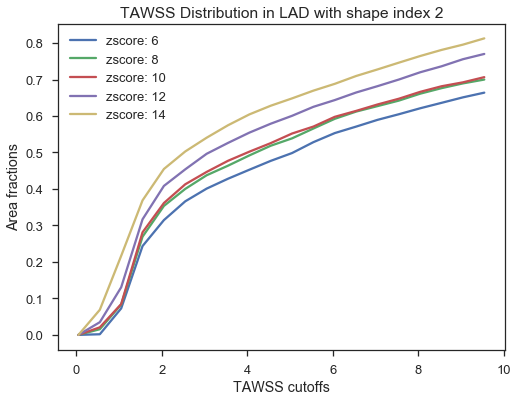

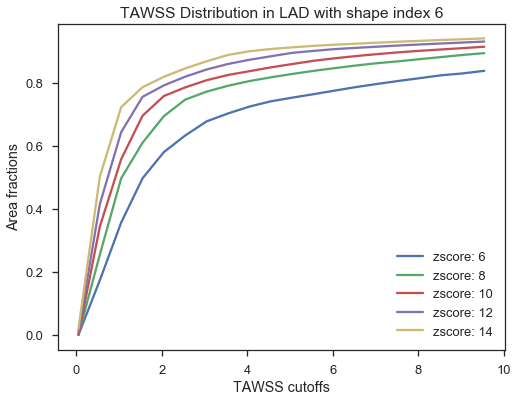

In [58]:
vessel = 'LAD/'
shapes = ['ASI2', 'ASI6']

z_scores = [6, 8, 10, 12, 14]
threshold_bounds = np.arange(.05, 10.0, .5)

for shape in shapes: 
    pos_sizes = {'LAD': ['lad1', 'lad2', 'lad3','lad4','lad5']}
    # if shape == 'ASI6': pos_sizes = {'LAD': ['lad2', 'lad3','lad4','lad5']}
        
    for position, size_list in pos_sizes.iteritems():
        # plt.figure(figsize=(12,12))
        plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            fracs = all_area_fractions_lad[shape + '_' + size]
            plt.plot(threshold_bounds, fracs, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('TAWSS Distribution in ' + vessel[:-1] + ' with shape index ' + shape[-1])
        plt.xlabel('TAWSS cutoffs')
        plt.ylabel('Area fractions')

In [49]:
wss_cycle_rca = read_from_file('WSS_CYCLE_RCA')
vtawss_rca = {}


reading structures from pickle
------------------------------


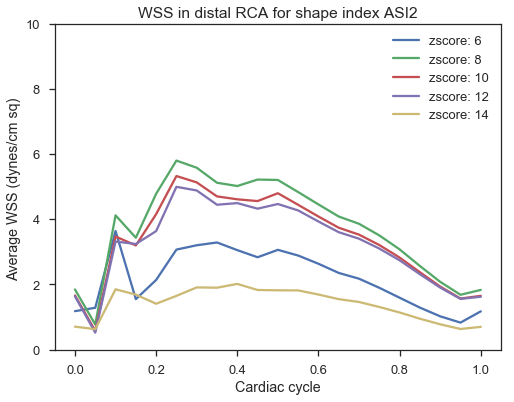

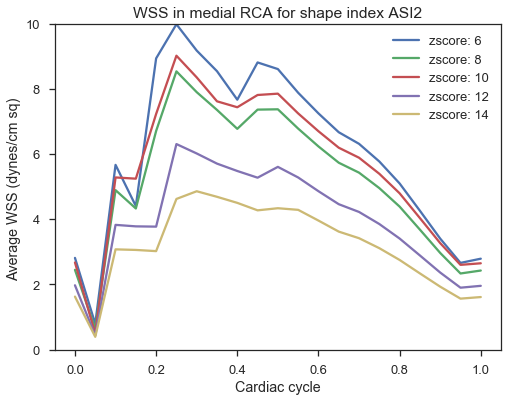

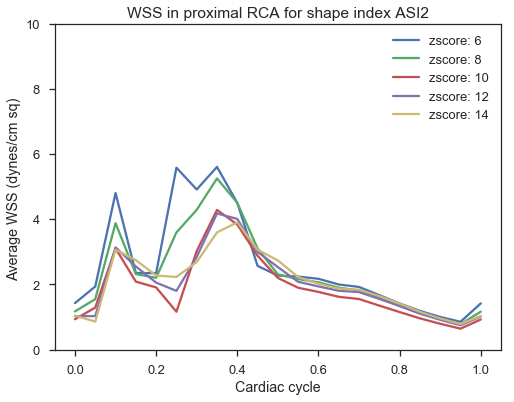

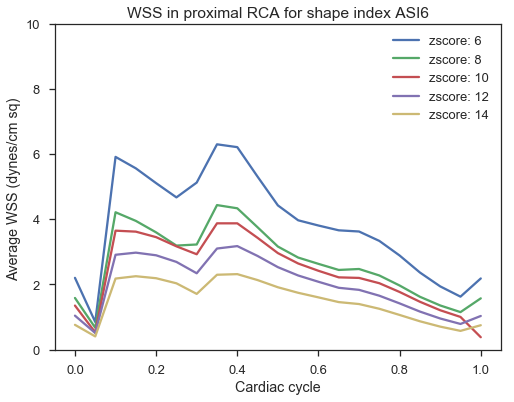

In [54]:
vessel = 'RCA/'
shapes = ['ASI2', 'ASI6']

proximal = ['p1', 'p2', 'p3', 'p4', 'p5']
medial = ['m1', 'm2', 'm3', 'm4', 'm5']
distal = ['d1', 'd2', 'd3', 'd4', 'd5']

z_scores = [6, 8, 10, 12, 14]

raw_time_steps = np.arange(3000, 4000 + 50, 50)
steps = np.linspace(0.0, 1.0, num=len(raw_time_steps))

for shape in shapes: 
    pos_sizes = {'proximal': proximal, 
                 'medial': medial, 
                 'distal': distal}
    
    if shape == 'ASI6': pos_sizes = {'proximal': proximal}
        
    for position, size_list in pos_sizes.iteritems():
        # plt.figure(figsize=(12,12))
        plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            wss, vtawss_rca[shape + '_' + size] = wss_cycle_rca[shape + '_' + size]
            plt.plot(steps, wss, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('WSS in ' + position + ' ' + vessel[:-1] +' for shape index ' + shape[-1])
        plt.xlabel('Cardiac cycle')
        plt.ylabel('Average WSS (dynes/cm sq) ')
        plt.ylim(0, 10)

In [63]:
print vtawss_rca

{'ASI2_m4': 6.162839121667573, 'ASI2_m5': 5.126702929367727, 'ASI2_m1': 9.325062506152364, 'ASI2_m2': 8.095573871819333, 'ASI2_m3': 8.065265043216073, 'ASI6_p5': 2.3028997812477656, 'ASI6_p4': 2.8064932741733815, 'ASI6_p3': 3.261438959592608, 'ASI6_p2': 3.489050047496766, 'ASI6_p1': 4.560024830802255, 'ASI2_p3': 4.528761021144777, 'ASI2_p2': 5.2734186400575, 'ASI2_p1': 5.70064056673873, 'ASI2_p5': 3.996549450840954, 'ASI2_p4': 4.258768687730675, 'ASI2_d5': 3.4756616674855416, 'ASI2_d4': 5.5074242924566015, 'ASI2_d3': 6.071565716206496, 'ASI2_d2': 7.036241712347224, 'ASI2_d1': 6.1060487762549345}


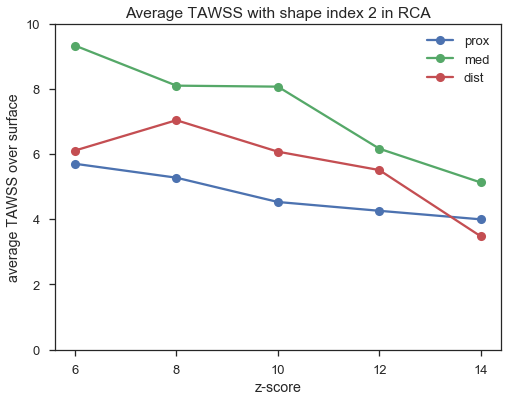

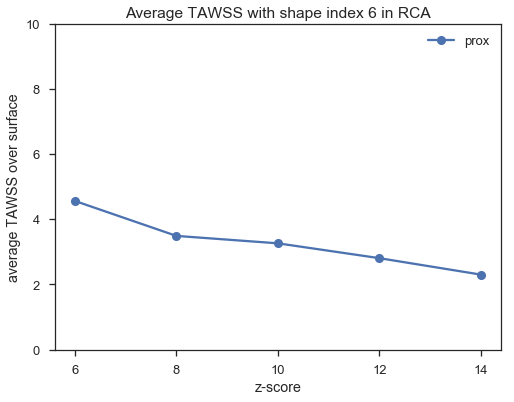

In [83]:
vessel = 'RCA'
shapes = ['ASI2', 'ASI6']
proximal = ['p1', 'p2', 'p3', 'p4', 'p5']
medial = ['m1', 'm2', 'm3', 'm4', 'm5']
distal = ['d1', 'd2', 'd3', 'd4', 'd5']

labels = ['prox', 'med', 'dist']
z_scores = [6, 8, 10, 12, 14]

for shape in shapes: 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    loc_set = [proximal, medial, distal]
    if shape == 'ASI6': loc_set = [proximal]
    for k, location_sizes in enumerate(loc_set):
        vtawss_surface_averages = np.zeros(len(location_sizes))
        for c, size in enumerate(location_sizes):
            vtawss_surface_averages[c] = vtawss_rca[shape + '_' + size]
        ax.plot(z_scores, vtawss_surface_averages, label=labels[k], marker='o')
    plt.legend()
    plt.xlabel('z-score')
    plt.ylabel('average TAWSS over surface')
    plt.title('Average TAWSS with shape index ' + shape[-1] + ' in ' + vessel)
    plt.ylim(0, 10)
    ax.set_xticks(z_scores)
            

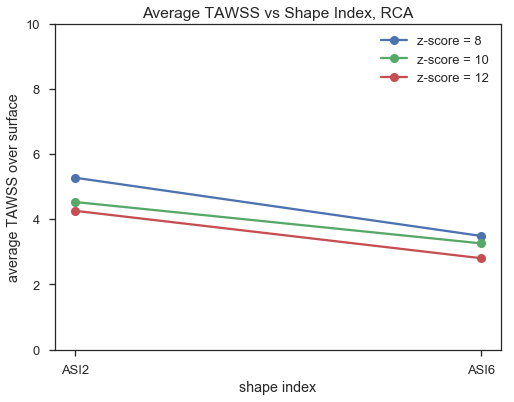

In [81]:
vessel = 'RCA'
shapes = ['ASI2', 'ASI6']
proximal = ['p2', 'p3', 'p4']
# medial = ['m1', 'm2', 'm3', 'm4', 'm5']
# distal = ['d1', 'd2', 'd3', 'd4', 'd5']

labels = ['prox', 'med', 'dist']
z_scores = [8, 10, 12]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for k, size in enumerate(proximal):  
    vtawss_surface_averages = np.zeros(len(shapes))
    for c, shape in enumerate(shapes):
        vtawss_surface_averages[c] = vtawss_rca[shape + '_' + size]
    
    ax.plot(shapes, vtawss_surface_averages, label='z-score = ' + str(z_scores[k]), marker='o')
    
plt.legend()
plt.xlabel('shape index')
plt.ylabel('average TAWSS over surface')
plt.title('Average TAWSS vs Shape Index, ' + vessel )
plt.ylim(0, 10)
plt.show()
    # ax.set_xticks(z_scores)

In [79]:
wss_cycle_lad = read_from_file('WSS_CYCLE_LAD')
vtawss_lad = {}

reading structures from pickle
------------------------------


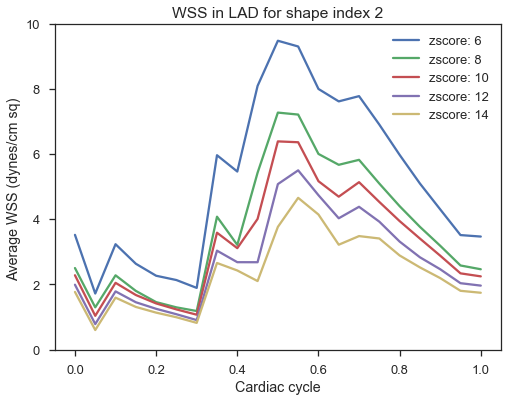

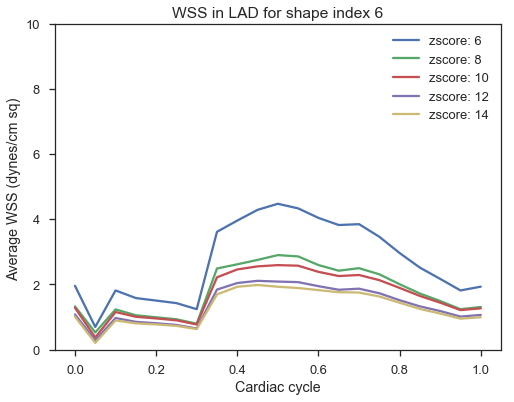

In [80]:
vessel = 'LAD/'
shapes = ['ASI2', 'ASI6']

z_scores = [6, 8, 10, 12, 14]
raw_time_steps = np.arange(3000, 4000 + 50, 50)
steps = np.linspace(0.0, 1.0, num=len(raw_time_steps))

for shape in shapes: 
    pos_sizes = {'LAD': ['lad1', 'lad2', 'lad3','lad4','lad5']}
        
    for position, size_list in pos_sizes.iteritems():
        # plt.figure(figsize=(12,12))
        plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            wss, vtawss_lad[shape + '_' + size] = wss_cycle_lad[shape + '_' + size]
            plt.plot(steps, wss, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('WSS in ' + vessel[:-1] + ' for shape index ' + shape[-1])
        plt.xlabel('Cardiac cycle')
        plt.ylabel('Average WSS (dynes/cm sq) ')
        plt.ylim(0, 10)

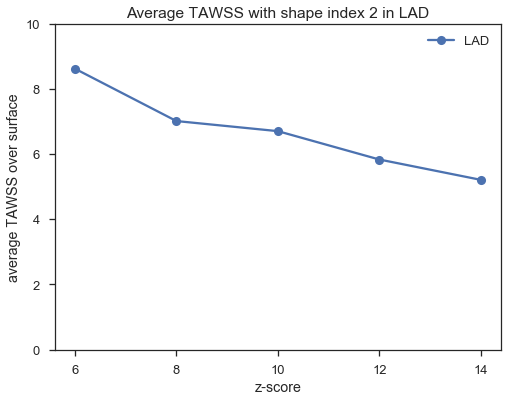

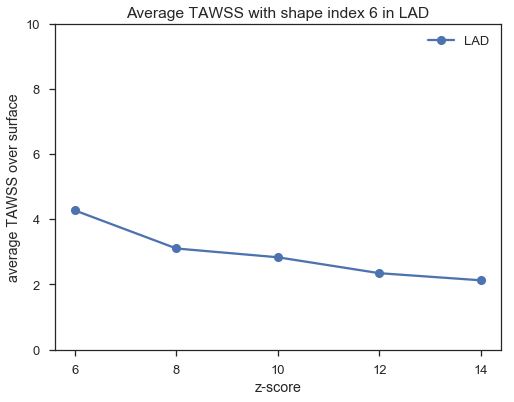

In [92]:
vessel = 'LAD'
shapes = ['ASI2', 'ASI6']
left_positions = ['lad1', 'lad2', 'lad3', 'lad4', 'lad5']

z_scores = [6, 8, 10, 12, 14]

for shape in shapes: 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    loc_set = left_positions
    vtawss_surface_averages = np.zeros(len(loc_set))
    for k, size in enumerate(loc_set):
        vtawss_surface_averages[k] = vtawss_lad[shape + '_' + size]

    ax.plot(z_scores, vtawss_surface_averages, label=vessel, marker='o')
    plt.legend()
    plt.xlabel('z-score')
    plt.ylabel('average TAWSS over surface')
    plt.title('Average TAWSS with shape index ' + shape[-1] + ' in ' + vessel)
    plt.ylim(0, 10)
    ax.set_xticks(z_scores)

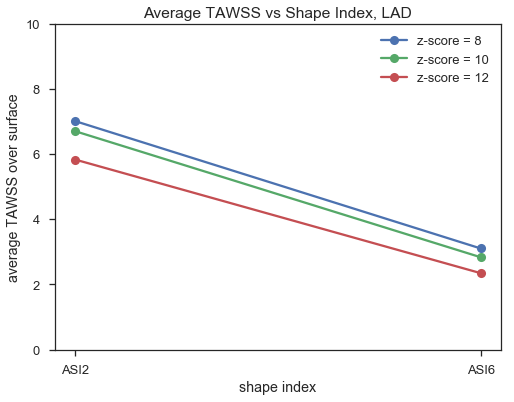

In [82]:
vessel = 'LAD'
shapes = ['ASI2', 'ASI6']
left_positions = ['lad2', 'lad3', 'lad4']
# medial = ['m1', 'm2', 'm3', 'm4', 'm5']
# distal = ['d1', 'd2', 'd3', 'd4', 'd5']

z_scores = [8, 10, 12]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for k, size in enumerate(left_positions):  
    vtawss_surface_averages = np.zeros(len(shapes))
    for c, shape in enumerate(shapes):
        vtawss_surface_averages[c] = vtawss_lad[shape + '_' + size]
    
    ax.plot(shapes, vtawss_surface_averages, label='z-score = ' + str(z_scores[k]), marker='o')
    
plt.legend()
plt.xlabel('shape index')
plt.ylabel('average TAWSS over surface')
plt.title('Average TAWSS vs Shape Index, ' +  vessel )
plt.ylim(0, 10)
plt.show()